### FE670 - Assignment #2

**Author**: Sid Bhatia

**Date**: October 12th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

Given $n$ securities with Expected Return Vector $\bm{\mu}$ and Covariance Matrix $\bm{\Sigma}$, the return of a portfolio with weights $\mathbf{w}$ is a random variable $R_p = \mathbf{w'R}$ with expected return and variance given by:

$$\mu_p = \mathbf{w'}\bm{\mu} \\ \sigma_p^2 = \mathbf{w'}\bm{\Sigma}\mathbf{w}$$

For now, we simply assume that expected returns, $\bm{\mu}$, and their covariance matrix $\bm{\Sigma}$, are given. To calculate the weights for one possible pair, we choose a targeted mean return, $\mu_0$.  Following Markowitz, the investor’s problem is constrained minimization problem:

$$\min_{w} \frac{1}{2} \mathbf{w'}\bm{\Sigma}\mathbf{w} \\ \text{s.t} \\ \mu_0 = \mathbf{w'}\bm{\mu}, \mathbf{w'1'} = 1, \mathbf{1'} = [1, 1, \cdots, 1]$$

We refer to this version of the classical mean-variance optimization problem as the *risk minimization formulation*, and this problem is a quadratic optimization problem with equality constraints with the solution given by:

$$w = \bm{\lambda}\bm{\Sigma^{-1}}\mathbf{1'} + \bm{\gamma\Sigma^{-1}\mu} \\ \text{where} \\ \bm{\lambda} = \frac{C - \mu_0B}{\Delta}, \bm{\gamma} = \frac{\mu_0A - B}{\Delta} \\ A = \bm{1'\Sigma^{-1}1}, B = \bm{1'\Sigma^{-1}\mu}, C = \bm{\mu'\Sigma^{-1}\mu} \\ \Delta = \mathbf{AC - B^2}$$

It is easy to see that:

$$\sigma_0^2 = \mathbf{w'}\bm{\Sigma^{-1}}\mathbf{w} \\ = \frac{A\mu_0^2 - 2B\mu_0 + C}{\Delta}$$

Now, we take $n = 2$ and denote the optimal solution by $w(\sigma_0^2)$, and assume that the expected $\bf{\mu} = \begin{pmatrix} 0.05 \\ 0.10 \end{pmatrix}$ and $\bf{\Sigma} = \begin{pmatrix} 0.01 & - 0.01 \\ -0.01 & 0.04 \end{pmatrix}$, please answer the following questions:

1. Please plot the efficient frontier of the portfolio, and calculate variance when $\bm{\mu_0} = 0.10$ and $\bm{\mu_0} = 0.20$ manually.

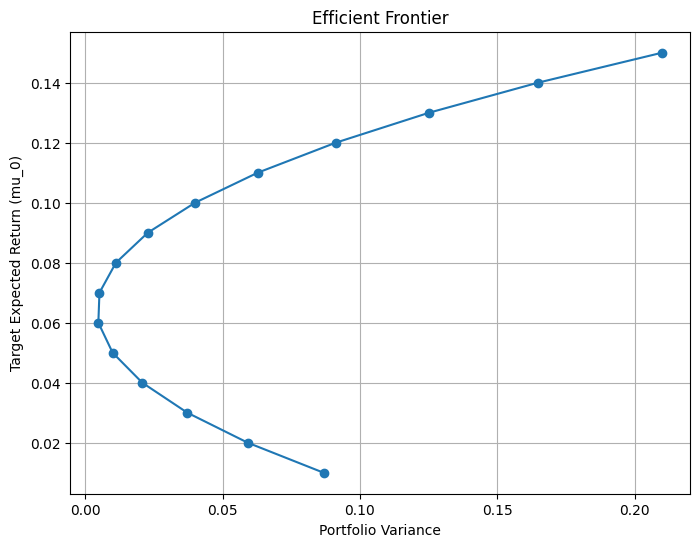

Portfolio Variance for mu_0 = 0.10: 0.04
Portfolio Variance for mu_0 = 0.20: 0.52


In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = np.array([0.05, 0.10])
covariance_matrix = np.array([[0.01, -0.01], [-0.01, 0.04]])

# Calculate inverse of covariance matrix.
sigma_inverse = np.linalg.inv(covariance_matrix)

# Create a range of target expected returns (mu_0).
mu_0_range = np.arange(0.01, 0.16, 0.01)

# Initialize arrays to store portfolio variances.
portfolio_variances = []


# Define respective solution variables.
ones = np.ones(2)
A = ones @ sigma_inverse @ ones
B = ones @ sigma_inverse @ mu
C = mu @ sigma_inverse @ mu
Delta = A * C - B**2

def calc_sigma_0_squared(A, B, C, Delta, mu_0):
    """
    Write a function to calculate sigma_0_squared based on A, B, C, Delta, and mu_0.
    """
    sigma_0_squared = (A * mu_0**2 - 2 * B * mu_0 + C) / Delta
    return sigma_0_squared

# Calculate portfolio variances for each mu_0.
for mu_0 in mu_0_range:
    portfolio_variances.append(calc_sigma_0_squared(A, B, C, Delta, mu_0))

# Plot the Efficient Frontier.
plt.figure(figsize=(8, 6))
plt.plot(portfolio_variances, mu_0_range, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Variance')
plt.ylabel('Target Expected Return (mu_0)')
plt.grid(True)
plt.show()

# Calculate portfolio variance for mu_0 = 0.10 and mu_0 = 0.20.
mu_0_1 = 0.10
mu_0_2 = 0.20

sigma_0_1_squared = calc_sigma_0_squared(A, B, C, Delta, mu_0_1)
sigma_0_2_squared = calc_sigma_0_squared(A, B, C, Delta, mu_0_2)

print(f'Portfolio Variance for mu_0 = 0.10: {sigma_0_1_squared:.2f}')
print(f'Portfolio Variance for mu_0 = 0.20: {sigma_0_2_squared:.2f}')

2. If we introduce a risk free rate $R_f = 0.02$, please find the **market portfolio** of these two stock portfolio, and calculate the slope of the **Capital Market Line (CML)** along with the portfolio frontier.

In this case, the portfolio's expected return and variance are:

$$\mu_p = \mathbf{w'_R}\bm{\mu} + (1 - \mathbf{w'_R}I)R_f \\ \sigma_p^2 = \mathbf{w'_R}\Sigma{w_R}$$

since the risk-free asset has zero variance and is uncorrelated with the risky assets.

As such, the investor's objective is again for a targeted level of expected portfolio return, $\mu_0$, to choose allocations by solving a quadratic optimization problem:

$$\min_{w_R}\mathbf{w'_R}\Sigma\mathbf{w_R} \\ \text{subject to} \\ \mu_0 = \mathbf{w'_R}\bm{\mu} + (1 - \mathbf{w'_R}I)R_f$$

The optimal portfolio weights are given by:

$$\mathbf{w_R} = C\bm{\Sigma^{-1}}(\bm{\mu} - R_f \mathbf{I}) \\ \text{where} \\ C = \frac{\mu_0 - R_f}{(\bm{\mu} - R_f \mathbf{I})'\Sigma^{-1}(\bm{\mu} - R_f \mathbf{I})}$$

Therefore, with a risk-free asset, all minimum variance portfolios are a combination of the risk-free asset and a given risky portfolio. The risky portfolio is often called tangency portfolio or market portfolio.

The slope of the Capital Market Line (CML) is defined as:

$$S = \frac{\mu_m - R_f}{\sigma_m}$$

In [18]:
R_f = 0.02

# Calculate the difference between risky asset returns and the risk-free rate.
mu_diff = mu - R_f * ones

# Define a function to calculate market portfolio weights and CML slope
def calculate_market_portfolio(mu_0):
    # Calculate the scalar C.
    C = (mu_0 - R_f) / (mu_diff @ sigma_inverse @ mu_diff)

    # Calculate the market portfolio weights for the risky assets.
    w_R = C * sigma_inverse @ mu_diff

    # Calculate the expected return of the market portfolio.
    mu_m = w_R @ mu + (1 - w_R @ ones) * R_f

    # Calculate the standard deviation (risk) of the market portfolio.
    sigma_m = np.sqrt(w_R @ covariance_matrix @ w_R)

    # Calculate the slope of the CML (S).
    S = (mu_m - R_f) / sigma_m

    return w_R, mu_m, sigma_m, S

mu_0 = 0.10
w_R, mu_m, sigma_m, S = calculate_market_portfolio(mu_0)

# Print the results.
print(f"Market Portfolio Weights for Risky Assets (w_R): {w_R}")
print(f"Expected Return of the Market Portfolio (mu_m): {mu_m:.4f}")
print(f"Standard Deviation of the Market Portfolio (sigma_m): {sigma_m:.4f}")
print(f"Slope of the CML (S): {S:.4f}")

Market Portfolio Weights for Risky Assets (w_R): [1.08108108 0.59459459]
Expected Return of the Market Portfolio (mu_m): 0.1000
Standard Deviation of the Market Portfolio (sigma_m): 0.1139
Slope of the CML (S): 0.7024


#### Problem #2

Suppose that are $N = 3$ assets $s_1$, $s_2$, and $s_3$ respectively. The covariance matrix and expected rates of return are:

$$\bm{\Sigma} = \begin{bmatrix}
3.0 & 1.5 & 0.0 \\
1.5 & 3.0 & 1.5 \\
0.0 & 1.5 & 3.0
\end{bmatrix} \text{and} \; \bm{\mu} = \begin{bmatrix}
0.5 \\
0.3 \\
0.7
\end{bmatrix}$$

One of the basic assumptions underlying the Black-Litterman model is that the expected return of a security should be consistent with market equilibrium unless the investor has a specific view on the security, and the market equilibrium can be expressed as:

$$\bm{\Pi} = \bm{\mu} + \bm{\epsilon_{\Pi}}, \bm{\epsilon_{\Pi}} \sim \mathcal{N}(0, \tau\bm{\Sigma})$$

for some parameter $\tau << 1$. We can think about $\tau\bm{\Sigma}$ as our confidence in how well we can estimate the equilibrium expected returns.

Formally, $K$ views in Black-Litterman model are expressed as a vector $\mathbf{q}$ with:

$$\mathbf{q} = \mathbf{P}\bm{\mu} + \bm{\epsilon_q}, \bm{\epsilon_q} \sim \mathcal{N}(0, \bm{\Omega})$$

where $\mathbf{P}$ is a $K \times K$ matrix (explained in the following example) and $\bm{\Omega}$ is a $K \times K$ matrix expressing the confidence in the views.

Let us assume that the asset universe that we consider the three stocks and that an investor has the following two views ($K = 2$): (1) $s_1$ will have a return of $2.0\%$. (2) $s_3$ will outperform $s_2$ by $4.0\%$. Mathematically, we express the two views together as:

$$\begin{bmatrix} 2.0\% \\ 4.0\% \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & 1 \end{bmatrix} 

\begin{bmatrix} \mu_1 \\ \mu_2 \\ \mu_3 \end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \end{bmatrix}$$

We also assume a higher confidence in the views, and conversely we have:

$$\bm{\Omega} = \begin{bmatrix} 5\%^2 & 0 \\ 0 & 6\%^2 \end{bmatrix}$$

According to Black-Litterman, we will have:

$$\bm{\hat{\mu}}_{BL} = [(\tau\Sigma)^{-1} + \mathbf{P'}\Omega^{-1}\mathbf{P}]^{-1} [(\tau\Sigma)^{-1}\bm{\Pi} + \mathbf{P'}\Omega^{-1}\mathbf{q}]$$

where $\bm{\Pi}$ is the equilibrium risk premium over the risk free rate (3 x 1 vector) which can be calculated as $\bm{\mu}$ over the risk free rate of $r_f = 0.02$. Please answer the following questions using the data provided:

1. Find the minimum variance portfolio - MVP.

The minimum variance portfolio can be found by minimizing the portfolio variance subject to the constraint that the weights sum to 1.

$$W_{MVP} = \frac{\bm{\Sigma^{-1}}\mathbf{1'}}{\mathbf{1'}\bm{\Sigma^{-1}\mathbf{1}}}$$

In [185]:
from scipy.optimize import minimize

# Establish expected returns and covariance matrices.
Sigma = np.array([[3.0, 1.5, 0.0], 
                  [1.5, 3.0, 1.5], 
                  [0.0, 1.5, 3.0]])
                              
mu = np.array([0.5, 
               0.3, 
               0.7])

Sigma_inverse = np.linalg.inv(Sigma)

# Define the objective function to minimize portfolio variance.
def portfolio_variance(weights, Sigma):
    return weights @ Sigma @ weights

# Define the constraint that the sum of portfolio weights equals 1.
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Initial guess for portfolio weights (e.g., equal weights).
initial_weights = np.array([1/3, 1/3, 1/3])

# Set bounds for weights (0 <= weights <= 1).
bounds = ((0, 1), (0, 1), (0, 1))

# Perform the optimization to find the MVP.
result = minimize(portfolio_variance, initial_weights, args=(Sigma,), constraints=constraints, bounds=bounds)

# Extract the optimized portfolio weights.
mvp_weights = result.x

# Print the Minimum Variance Portfolio weights.
print("Minimum Variance Portfolio Weights:")
print(mvp_weights)

# Calculate the minimum variance (portfolio variance) of the MVP.
min_variance = result.fun
print("Minimum Variance (Portfolio Variance):", min_variance)

# Create ones matrix.
ones = np.ones(3)

# Find MVP using formula defined above.
w_mvp = (Sigma_inverse @ ones) / (ones @ Sigma_inverse @ ones)
print("Minimum Variance Portfolio (MVP) Weights using Formula:", w_mvp)

Minimum Variance Portfolio Weights:
[4.99999993e-01 5.55111512e-17 5.00000007e-01]
Minimum Variance (Portfolio Variance): 1.5
Minimum Variance Portfolio (MVP) Weights using Formula: [0.5 0.  0.5]


2. If the risk free rate is $r_f$ , find an efficient portfolio risky assets, and plot the efficient portfolio frontier.

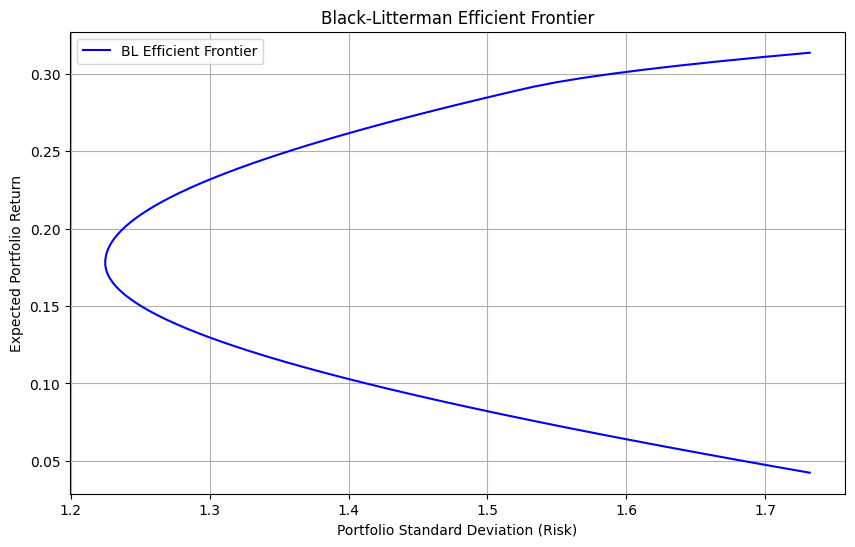

In [85]:
# Define other matrices for BL model.
P = np.array([[1, 0, 0], 
              [0, -1, 1]])

# Establish 2.0% and 4.0% views.
q = np.array([0.02, 0.04])

Omega = np.array([[0.05**2, 0], 
                  [0, 0.06**2]])
tau = 0.03
rf = 0.02

Pi = mu - rf
M_inverse = np.linalg.inv(tau * Sigma)

adj_return = np.linalg.inv(M_inverse + P.T @ np.linalg.inv(Omega) @ P)
adj_return = adj_return @ (M_inverse @ Pi + P.T @ np.linalg.inv(Omega) @ q)

# Create a range of desired returns
desired_returns = np.linspace(min(adj_return), max(adj_return), 100)
portfolio_risks = []

inv_Sigma = np.linalg.inv(Sigma)

for mu_star in desired_returns:
    # Define the quadratic problem
    A = 2 * Sigma
    B = np.zeros(mu.shape[0])
    C = 0
    constraints = [{'type': 'eq', 'fun': lambda w: w @ adj_return - mu_star},
                   {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in mu]
    initial_guess = [1./mu.shape[0] for _ in mu]

    # Minimize the negative Sharpe ratio
    from scipy.optimize import minimize
    solution = minimize(lambda w: w.T @ Sigma @ w, initial_guess, constraints=constraints, bounds=bounds)
    w_optimal = solution.x

    # Compute portfolio risk
    port_variance = w_optimal.T @ Sigma @ w_optimal
    port_std = np.sqrt(port_variance)
    portfolio_risks.append(port_std)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, desired_returns, 'b-', label="BL Efficient Frontier")
plt.xlabel("Portfolio Standard Deviation (Risk)")
plt.ylabel("Expected Portfolio Return")
plt.title("Black-Litterman Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()

3. Assume we have $\tau = 0.03$, please calculate the expected return conditional on the views $\bm{\hat{\mu}}_{BL}$.

In [86]:
adj_return = np.linalg.inv(M_inverse + P.T @ np.linalg.inv(Omega) @ P)
adj_return = adj_return @ (M_inverse @ Pi + P.T @ np.linalg.inv(Omega) @ q)

print("Expected Return Conditional on Views \hat{\mu}_BL:", adj_return)

Expected Return Conditional on Views \hat{\mu}_BL: [0.04233379 0.24434193 0.31364993]


4. Based on $\bm{\hat{\mu}}_{BL}$, recalculate the minimum variance portfolio. Please provide comments on the differences between the original MVP and the adjusted MVP.

In [87]:
# Calculate the weights of the adjusted MVP.
w_MVP_BL = Sigma_inverse @ adj_return / (adj_return.T @ Sigma_inverse @ adj_return)

# Normalize the weights to ensure they sum up to 1.
w_MVP_BL /= np.sum(w_MVP_BL)

print("Weights of Adjusted MVP:", w_MVP_BL)

Weights of Adjusted MVP: [-0.06746455  0.37277024  0.69469431]


Comparing these weights with the original MVP weights:

- Original MVP: $[0.5, 0, 0.5]$
- Adjusted MVP (BL): $[-0.06746455, 0.37277024, 0.69469431]$

We observe:
1. The allocation to $s_1$ has shifted from a long position to short position.
2. $s_2$, which originally had no allocation in the MVP, now has a notable positive weight in the BL-adjusted MVP.
3. $s_3$ still remains favored but sees a substantial increase in allocation in the BL-adjusted portfolio compared to the original MVP.

#### Problem 3

You are given a dataset for the S&P500 stock index which consists of the high, low, opening, and closing price of each of the 500 stocks as well as
the volume of each stock for each day (in *all_stocks_5yr.csv*).  Stocks vary in the length for which they have historical data, as some companies have been public longer than other. This dataset includes all data from 2013 to 2018.

Rather than considering the actual price of the stock (since some stock prices are much higher or lower than others), the change in stock price from one closing bell to the next is considered for all 500 stocks. You can get S&P 500 index returns for the same period from Yahoo finance using Python Pandas DataReader package. In this problem, we would select 20 stocks from the S&P 500: 10 with the highest volatility and 10 with the lowest volatility.

Please answer the following questions using the dataset:

1. Use data from 2013 to 2016 data to build the global minimum variance portfolio (allowing for short sales). And, compare the portfolio daily return for the period from 2017 to 2018 with the S&P 500 index daily return using Sharpe ratio.

For the weights for the Global Minimum Variance (GMV) Portfolio, we use the following:

$$w_{GMV} = \frac{\bm{\Sigma^{-1} \mathbf{1}}}{\mathbf{1'} \bm{\Sigma^{-1} \mathbf{1}}}$$

In [193]:
import yfinance as yf

# Load the dataset.
data = pd.read_csv("all_stocks_5yr.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Pivot the data so each stock is a column.
returns = data.pivot(columns='Name', values='close').pct_change().dropna(how='all')

# Drop NaN values for each stock's returns.
clean_returns = returns.dropna(axis=1, how='any')

# Compute volatilities and filter by highest 10 and lowest 10 volatility stocks.
volatilities = clean_returns.std()
top_volatile = volatilities.nlargest(10).index.tolist()
least_volatile = volatilities.nsmallest(10).index.tolist()

# Retrieve selected stocks and respective returns.
selected_stocks = top_volatile + least_volatile
returns_selected = returns[selected_stocks]

print(selected_stocks)

# Compute covariance matrix and inverse for selected stocks.
Sigma = returns_selected['2013':'2016'].cov()
Sigma_inv = np.linalg.inv(Sigma)

# Calculate the weights of the GMV portfolio.
ones = np.ones(len(Sigma_inv))
weights = Sigma_inv @ ones / (ones @ Sigma_inv @ ones)

print(weights)
print(sum(weights))

# Compute portfolio returns from 2017 to 2018.
portfolio_returns = returns_selected['2017':'2018'].dot(weights)

# Import S&P500 data.
sp500 = yf.download('^GSPC', start='2017-01-01', end='2018-12-31')
sp500_returns = sp500['Close'].pct_change().dropna()

# Establish risk-free rate at 0% (back when interest rates were 0%).
risk_free_rate = 0.00

# Compute the Sharpe Ratio for portfolio.
sharpe_portfolio = (portfolio_returns.mean() - risk_free_rate) / portfolio_returns.std()

# Compute the Sharpe Ratio for S&P 500.
sharpe_sp500 = (sp500_returns.mean() - risk_free_rate) / sp500_returns.std()

print("Sharpe Ratio for Portfolio:", sharpe_portfolio)
print("Sharpe Ratio for S&P 500:", sharpe_sp500)

['CHK', 'AMD', 'FCX', 'LNT', 'VRTX', 'INCY', 'MRO', 'WMB', 'RRC', 'MU', 'PEP', 'WM', 'RSG', 'KO', 'PG', 'JNJ', 'SO', 'BRK.B', 'MCD', 'CB']
[ 1.13080930e-02 -3.85699330e-03 -1.45403001e-02  7.29712202e-04
 -8.15187157e-03 -9.39960326e-05 -1.09943117e-02 -1.10262623e-02
  2.62945630e-02 -9.15279718e-03  5.60934040e-02  1.56642614e-01
  1.08078555e-01  6.72635185e-02  1.03977079e-01  1.25913076e-01
  1.67888281e-01 -1.22687641e-02  1.65963691e-01  7.99327103e-02]
0.9999999999999998
[*********************100%***********************]  1 of 1 completed
Sharpe Ratio for Portfolio: 0.03984182322711774
Sharpe Ratio for S&P 500: 0.027651996137101276


2. Now let’s put constraints on the weight of all 20 stocks. Assume that the portfolio weights add up to 1, and we want to make sure each stock has minimum weight of 0.0001. Compare this new portfolio daily return with the unconstrained portfolio in the last question for the period from 2017 and 2018.

In [200]:
from scipy.optimize import minimize

# Write objective function to minimize portfolio variance.
def objective(weights): 
    return weights.T @ Sigma @ weights

# Establish constraints.
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # Weights sum up to 1

# Write bounds for weights (0.0001 <= weight <= 1).
bounds = [(0.0001, 1) for i in range(len(selected_stocks))]

# Add an initial guess for weights (uniform distribution).
init_guess = [1./len(selected_stocks) for i in selected_stocks]

# Implement optimization.
solution = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
weights_constrained = solution.x

# Retrieve returns for constrained portfolio.
portfolio_returns_constrained = returns_selected['2017':'2018'].dot(weights_constrained)

sharpe_unconstrained = sharpe_portfolio

# Compute Sharpe Ratio for Constrained Portfolio
sharpe_constrained = (portfolio_returns_constrained.mean() - risk_free_rate) / portfolio_returns_constrained.std()

print(f"Sharpe Ratio for Unconstrained Portfolio:, {sharpe_unconstrained:.4f}")
print(f"Sharpe Ratio for Constrained Portfolio:, {sharpe_constrained:.4f}")

Sharpe Ratio for Unconstrained Portfolio:, 0.0398
Sharpe Ratio for Constrained Portfolio:, 0.0429


The constrained portfolio has a slightly higher Sharpe ratio than the unconstrained one.

The constrained portfolio (0.0429) has a better risk-adjusted performance than the unconstrained portfolio (0.0398) over the period from 2017 to 2018. This means, for the level of risk taken, the constrained portfolio provided a slightly better return.

The difference between the two Sharpe ratios is small (0.0031), but it indicates that the constraints applied (making sure each stock has a minimum weight) might have improved the risk-return trade-off slightly.